In [1]:
from plot_funcs import get_results, plot_avg_ranks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import FeatureAgglomeration

ModuleNotFoundError: No module named 'helpers'

In [ ]:
def get_clusters(df, n_clusters=2):
    
    clusterer = FeatureAgglomeration(n_clusters=n_clusters, linkage='ward')
    clusterer.fit(df)
    
    u_labels = np.unique(clusterer.labels_)
    
    labels = [list(np.array(list(df))[clusterer.labels_ == i])
              for i in u_labels]
    
    return labels

In [ ]:
# Load results
results = get_results('../Exp/results')

In [4]:
data = pd.read_pickle('../data/dataset.pkl')
targets_df = pd.DataFrame(data['target'].dropna())

binary_cols = [col for col in targets_df if targets_df[col].dtype.name == 'category']
float_cols = [col for col in targets_df if targets_df[col].dtype.name != 'category']

binary_df = targets_df[binary_cols].copy()
binary_df = binary_df.astype('float')
float_df = targets_df[float_cols].copy()

In [5]:
float_df.shape

(7894, 22)

In [6]:
# Scale float df
float_df[:] = StandardScaler().fit_transform(float_df)

# Get 2 clusters
float_clusters = get_clusters(float_df, n_clusters=2)
print(float_clusters[0])
print()
print(float_clusters[1])
print()
print()

# Get binary clusters
binary_clusters = get_clusters(binary_df, n_clusters=2)
print(binary_clusters[0])
print()
print(binary_clusters[1])
print()

['demo_prnt_age_p', 'lmt_scr_perc_correct', 'neighb_phenx_ss_mean_p', 'neurocog_pc1.bl', 'neurocog_pc2.bl', 'neurocog_pc3.bl', 'nihtbx_cardsort_uncorrected', 'nihtbx_list_uncorrected', 'nihtbx_pattern_uncorrected', 'nihtbx_picvocab_uncorrected', 'nihtbx_reading_uncorrected', 'pea_wiscv_trs', 'sports_activity_activities_p_performance', 'sports_activity_activities_p_team_sport']

['anthro_height_calc', 'anthro_waist_cm', 'anthro_weight_calc', 'cbcl_scr_syn_rulebreak_r', 'devhx_20_motor_dev_p', 'devhx_2_birth_wt_lbs_p', 'interview_age', 'macvs_ss_r_p']


['accult_phenx_q2_p', 'devhx_18_mnths_breast_fed_p_binary', 'devhx_6_pregnancy_planned_p', 'devhx_mother_probs_binary', 'married.bl', 'sex_at_birth', 'sleep_ss_total_p_binary']

['asr_scr_thought_r_binary', 'cbcl_scr_syn_aggressive_r_binary', 'devhx_12a_born_premature_p', 'devhx_15_days_incubator_p_binary', 'devhx_5_twin_p', 'devhx_distress_at_birth_binary', 'devhx_ss_alcohol_avg_p_binary', 'devhx_ss_marijuana_amt_p_binary', 'ksads_OCD_co

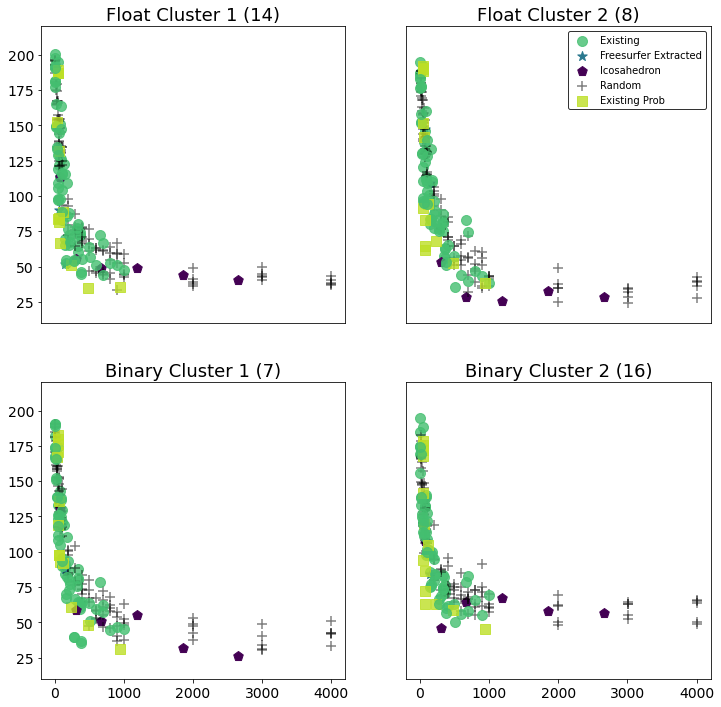

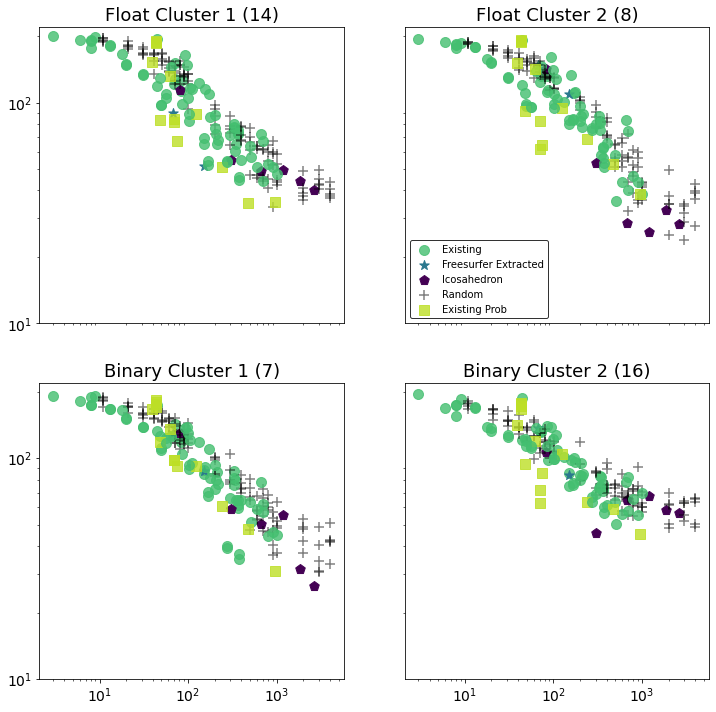

In [7]:
def make_by_clusters(log=False):

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    _ = plot_avg_ranks(results, random=True, base=True, log=log,
                       prob=True, fs=True, ico=True, ax=axes[0][0],
                       only_targets=float_clusters[0])
    axes[0][0].set_title(f'Float Cluster 1 ({len(float_clusters[0])})', fontsize=18)

    handles, labels = axes[0][0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    _ = plot_avg_ranks(results, random=True, base=True, log=log,
                       prob=True, fs=True, ico=True, ax=axes[0][1],
                       only_targets=float_clusters[1])
    axes[0][1].set_title(f'Float Cluster 2 ({len(float_clusters[1])})', fontsize=18)

    _ = plot_avg_ranks(results, random=True, base=True, log=log,
                       prob=True, fs=True, ico=True, ax=axes[1][0],
                       only_targets=binary_clusters[0])
    axes[1][0].set_title(f'Binary Cluster 1 ({len(binary_clusters[0])})', fontsize=18)

    _ = plot_avg_ranks(results, random=True, base=True, log=log,
                       prob=True, fs=True, ico=True, ax=axes[1][1],
                       only_targets=binary_clusters[1])
    axes[1][1].set_title(f'Binary Cluster 2 ({len(binary_clusters[1])})', fontsize=18)

    for i in range(2):
        for j in range(2):
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylim(10, 220)
            axes[i][j].get_legend().remove()


    axes[0][1].legend(by_label.values(), by_label.keys(),
                      edgecolor='black', framealpha=None)

    axes[0][1].set_xticks([])
    axes[0][1].set_yticks([])
    axes[1][1].set_yticks([])
    axes[0][0].set_xticks([])
    
make_by_clusters(log=False)
plt.savefig('Figures/by_clusters_base.png', dpi=300)
make_by_clusters(log=True)
plt.savefig('Figures/by_clusters_log.png', dpi=300)

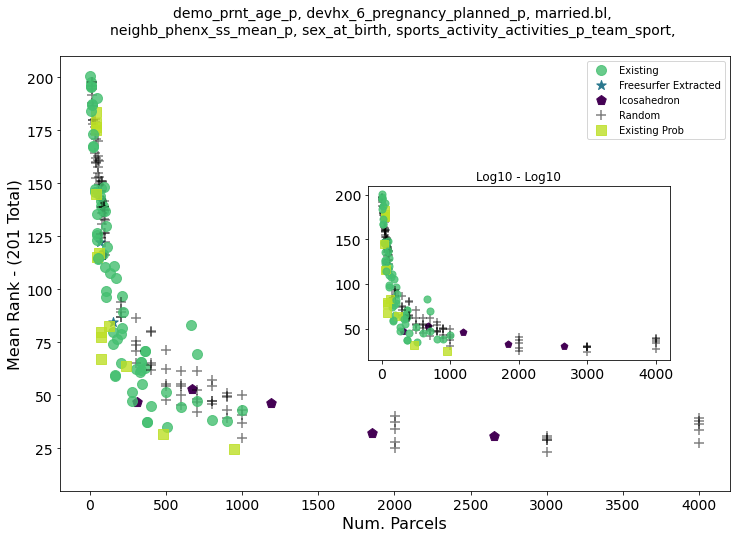

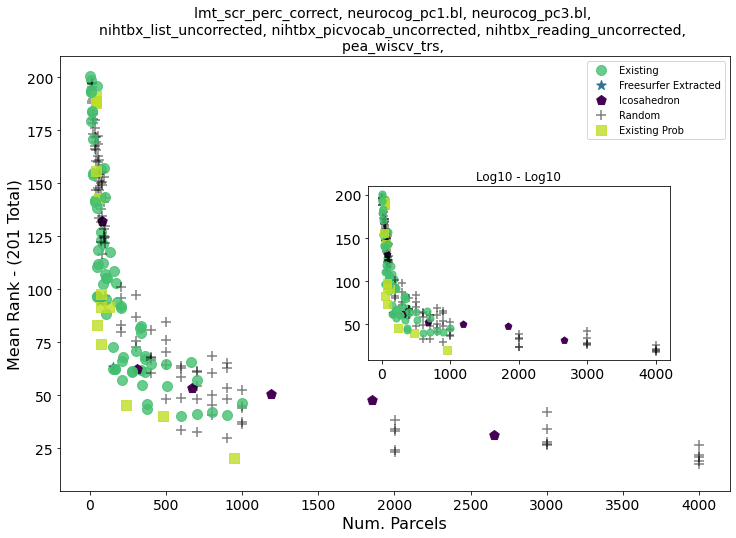

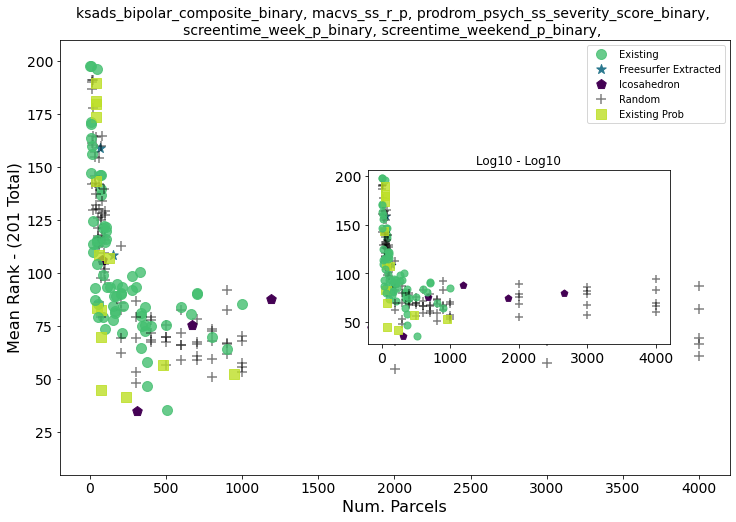

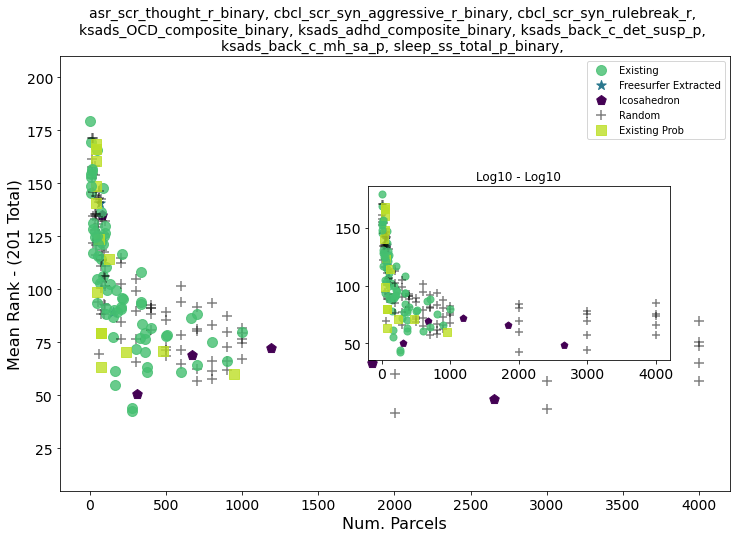

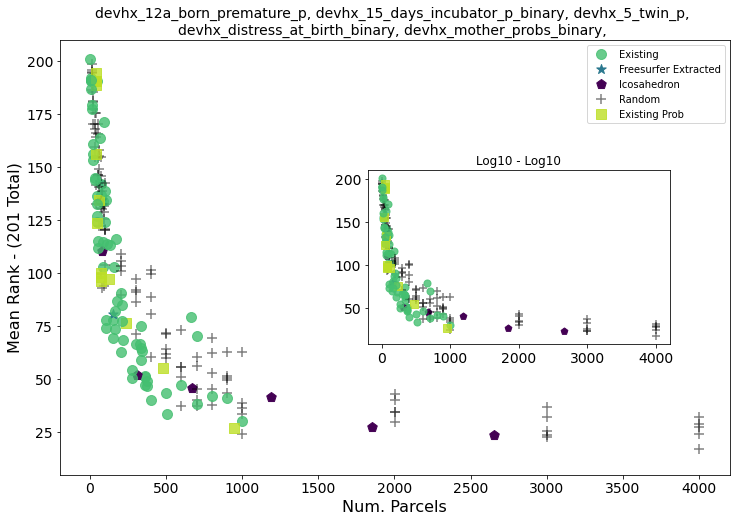

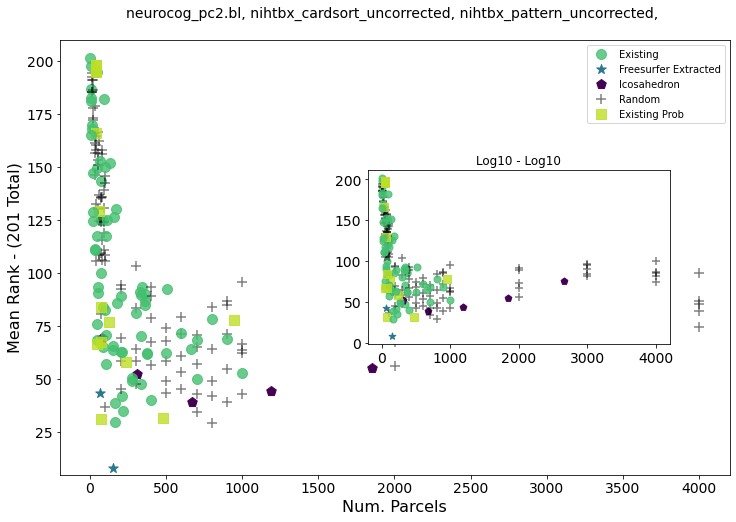

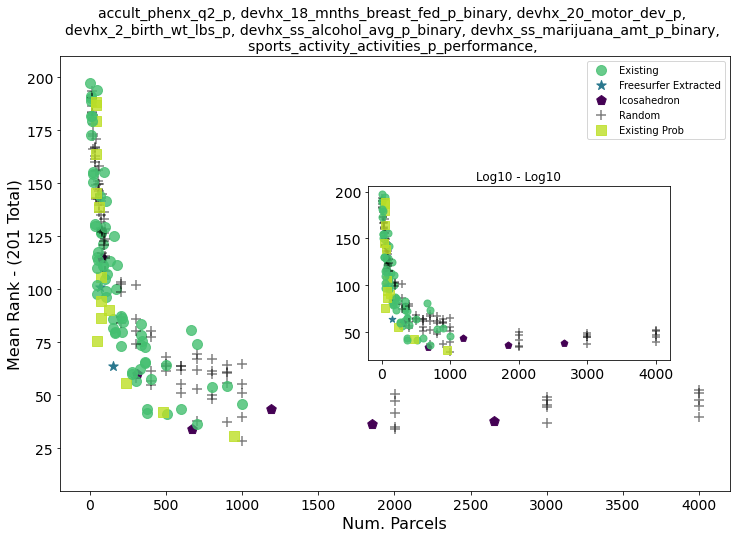

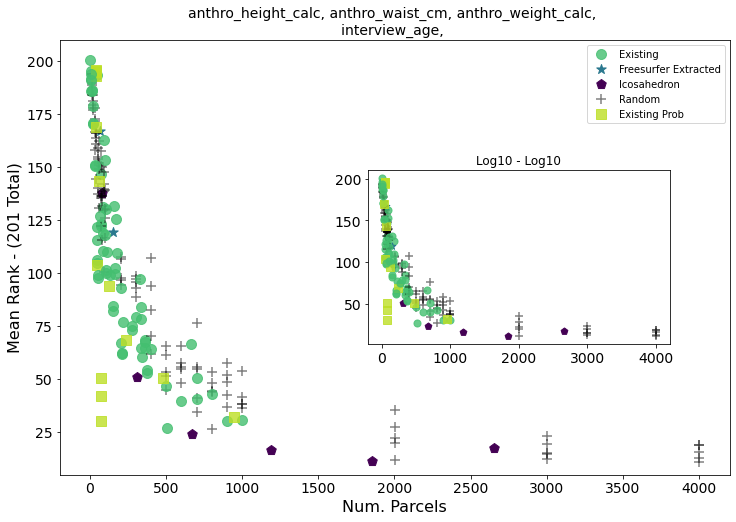

In [8]:
def with_newlines(cluster):
    
    new_cluster = []
    for i, c in enumerate(cluster):
        
        c = c + ', '
        if i % 3 == 2:
            new_cluster.append(c + '\n')
        else:
            new_cluster.append(c)

    return new_cluster

# Scale everything
targets_df[:] = StandardScaler().fit_transform(targets_df)

# Get 8 clusters
all_clusters = get_clusters(targets_df, n_clusters=8)
cluster_names = [with_newlines(c) for c in all_clusters]

for i in range(len(all_clusters)):

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    axins = inset_axes(ax, width="45%", height="40%",
                       borderpad=6, loc=7)
    
    plot_avg_ranks(results, random=True, base=True,
                   prob=True, fs=True, ico=True, ax=ax,
                   only_targets=all_clusters[i])
    ax.set_ylim(5, 210)
    
    plot_avg_ranks(results, random=True, base=True,
                   prob=True, fs=True, ico=True, log=True,
                   ax=axins, sm=.5,
                   only_targets=all_clusters[i])

    axins.set_xlabel('')
    axins.set_ylabel('')
    axins.set_title('Log10 - Log10')
    axins.get_legend().remove()
    
    ax.set_title(''.join(cluster_names[i]), fontsize=14)
    plt.savefig(f'Figures/all_targets_cluster_{i}.png', dpi=300)